In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

## **Data Pre-Processing**

### 3.1 Data Inspection and Summary Statistics

In [2]:
df=pd.read_csv("C:/Users/bikki/Downloads/Diabetes.csv")
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Outcome
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [3]:
df = df.rename(columns={
    ' Number of times pregnant': 'Pregnancies',
    ' Plasma glucose concentration': 'Glucose',
    ' Diastolic blood pressure': 'Blood_Pressure',
    ' Triceps skin fold thickness': 'Skin_Thickness',
    ' 2-Hour serum insulin': 'Insulin',
    ' Body mass index': 'BMI',
    ' Diabetes pedigree function': 'Diabetes_Pedigree_Function',
    ' Age (years)': 'Age'
})

### 3.2 Data Cleaning and Feature Engineering

In [4]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64

#### There is no Missing Values in the Dataset 

In [5]:
print(df.duplicated().sum())

0


In [6]:
df['Outcome']=df['Outcome'].astype('category')
df['Outcome']=df['Outcome'].cat.codes

#### 3.3 Outlier Treatment

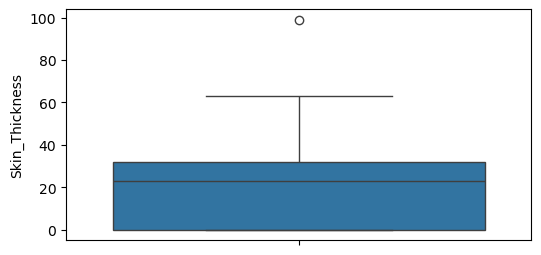

In [7]:
plt.figure(figsize=(6,3))
sns.boxplot(df['Skin_Thickness'])
plt.show()

In [8]:
df[df['Skin_Thickness'] ==0]

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [9]:
median_skin_thickness = df[df['Skin_Thickness']!=0]['Skin_Thickness'].median()
print(median_skin_thickness)
df['Skin_Thickness'] = df['Skin_Thickness'].replace(0,median_skin_thickness)

29.0


In [10]:
from scipy.stats import zscore

# Calculate Z-scores for Glucose and BMI
df['Glucose_Z'] = zscore(df['Glucose'])
df['BMI_Z'] = zscore(df['BMI'])
df['Skin_Thickness_Z'] = zscore(df['Skin_Thickness'])
df['Blood_Pressure_Z'] = zscore(df['Blood_Pressure'])
df['Diabetes_Pedigree_Function_Z'] = zscore(df['Diabetes_Pedigree_Function'])
df['Insulin_Z'] = zscore(df['Insulin'])
df['Pregnancies_Z'] = zscore(df['Pregnancies'])
df['Age_Z'] = zscore(df['Age'])

# Filter rows where Z-score is beyond ±3 (common threshold for outliers)
glucose_outliers = df[(df['Glucose_Z'].abs() > 3)]
bmi_outliers = df[(df['BMI_Z'].abs() > 3)]
skin_thickness = df[(df['Skin_Thickness_Z'].abs() > 3)]
blood_pressure = df[(df['Blood_Pressure_Z'].abs() > 3)]
diabetes_pedigree_function= df[(df['Diabetes_Pedigree_Function_Z'].abs() > 3)]
insulin = df[(df['Insulin_Z'].abs() > 3)]
pregnancies= df[(df['Pregnancies_Z'].abs() > 3)]
age = df[(df['Age_Z'].abs() > 3)]


print("Outliers in Glucose:", glucose_outliers.shape[0])
print("Outliers in BMI:", bmi_outliers.shape[0])
print("Outliers in Skin_Thickness:", skin_thickness.shape[0])
print("Outliers in Blood_Pressure:",blood_pressure.shape[0])
print("Outliers in Diabetes_Pedigree_Function:", diabetes_pedigree_function.shape[0])
print("Outliers in Insulin:", insulin.shape[0])
print("Outliers in Pregnancies:", pregnancies.shape[0])
print("Outliers in Age:", age.shape[0])

Outliers in Glucose: 5
Outliers in BMI: 14
Outliers in Skin_Thickness: 4
Outliers in Blood_Pressure: 35
Outliers in Diabetes_Pedigree_Function: 11
Outliers in Insulin: 18
Outliers in Pregnancies: 4
Outliers in Age: 5


Processing column: Glucose


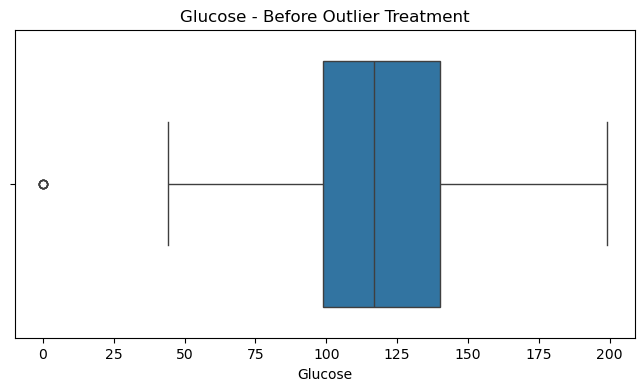

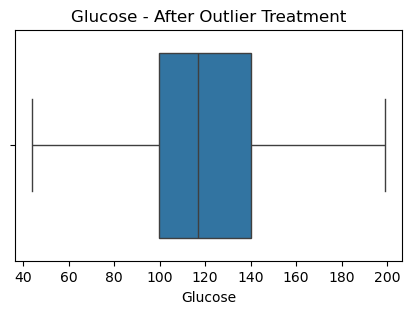

Processing column: Skin_Thickness


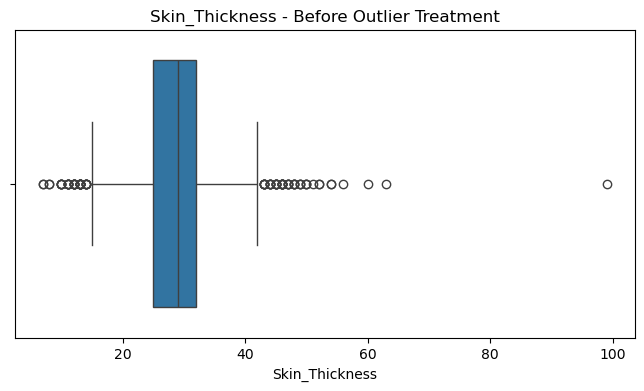

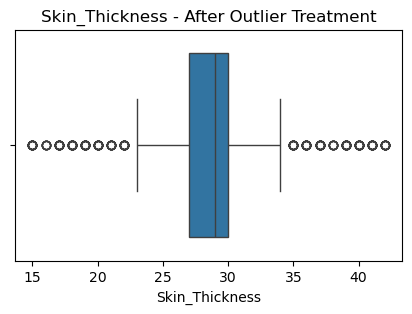

Processing column: Blood_Pressure


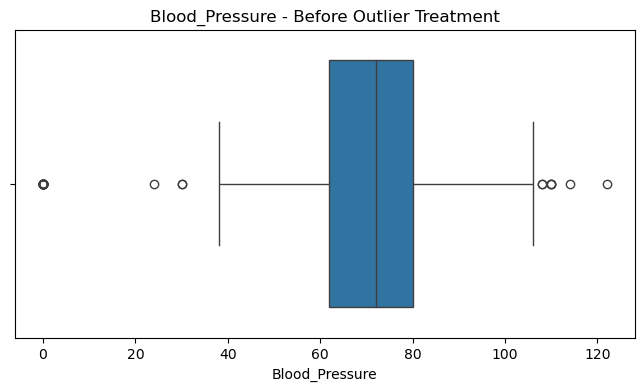

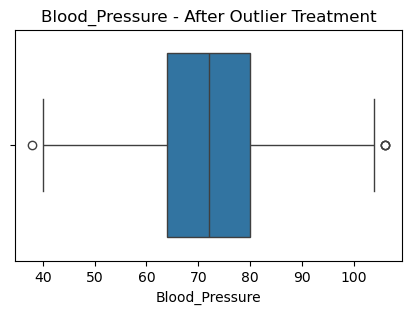

Processing column: Insulin


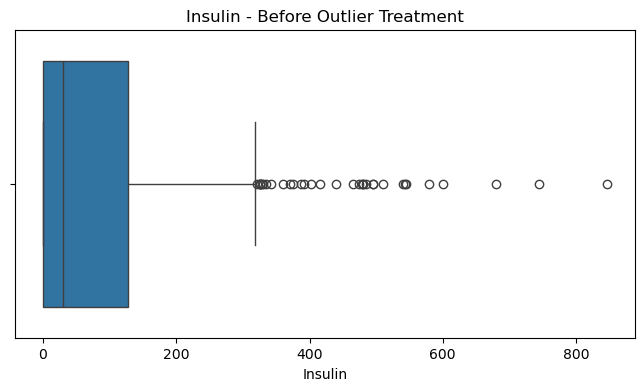

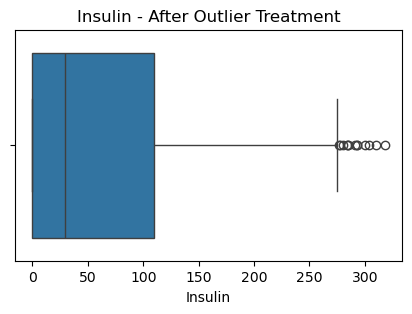

Processing column: BMI


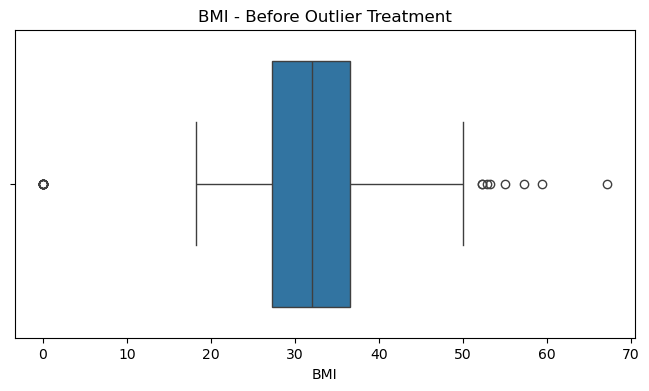

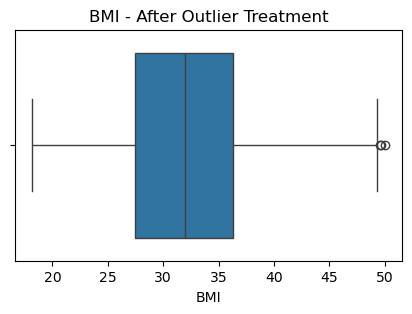

Processing column: Diabetes_Pedigree_Function


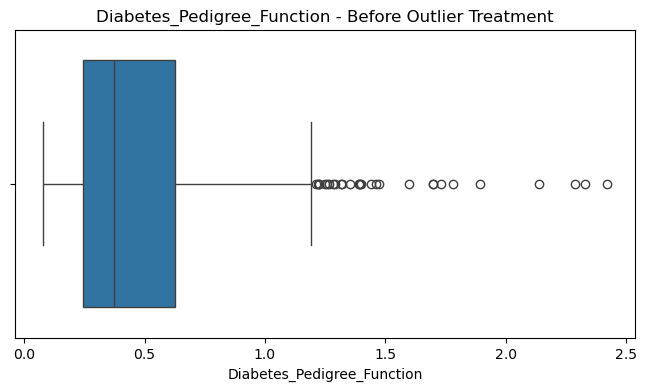

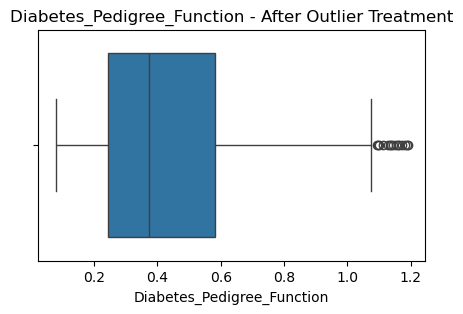

In [11]:
# Function for outlier detection and treatment
def outlier_treatment(df):
    # Specified columns for outlier treatment
    specified_columns = ["Glucose", "Skin_Thickness", "Blood_Pressure", "Insulin", "BMI", "Diabetes_Pedigree_Function"]
    
    for column in specified_columns:
        print(f"Processing column: {column}")
        
        # Box plot before treatment
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column])
        plt.title(f"{column} - Before Outlier Treatment")
        plt.show()
        
        # Calculate IQR, lower and upper bounds
        Q1 = df[column].quantile(0.25)  
        Q3 = df[column].quantile(0.75)  
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the median
        median_value = df[column].median()
        df[column] = df[column].apply(
            lambda x: median_value if x < lower_bound or x > upper_bound else x
        )
        
        # Box plot after treatment
        plt.figure(figsize=(5, 3))
        sns.boxplot(x=df[column])
        plt.title(f"{column} - After Outlier Treatment")
        plt.show()
    
    return df
df_cleaned = outlier_treatment(df)

## **4. Exploratory Data Analysis (EDA)**

In [12]:
df.describe()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome,Glucose_Z,BMI_Z,Skin_Thickness_Z,Blood_Pressure_Z,Diabetes_Pedigree_Function_Z,Insulin_Z,Pregnancies_Z,Age_Z
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,3.845052,121.656250,72.196615,28.759115,60.919271,32.198958,0.427667,33.240885,0.348958,-9.251859e-18,2.590520e-16,-1.526557e-16,1.503427e-17,2.451743e-16,-3.006854e-17,-6.476301e-17,1.931325e-16
std,3.369578,30.438286,11.146723,5.766472,77.635666,6.410558,0.245162,11.760232,0.476951,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,0.000000,44.000000,38.000000,15.000000,0.000000,18.200000,0.078000,21.000000,0.000000,-3.783654e+00,-4.060474e+00,-2.516429e+00,-3.572597e+00,-1.189553e+00,-6.928906e-01,-1.141852e+00,-1.041549e+00
25%,1.000000,99.750000,64.000000,27.000000,0.000000,27.500000,0.243750,24.000000,0.000000,-6.852363e-01,-5.955785e-01,-4.675972e-01,-3.673367e-01,-6.889685e-01,-6.928906e-01,-8.448851e-01,-7.862862e-01
50%,3.000000,117.000000,72.000000,29.000000,29.750000,32.000000,0.371750,29.000000,0.000000,-1.218877e-01,9.419788e-04,-1.230129e-02,1.496408e-01,-3.001282e-01,-4.280622e-01,-2.509521e-01,-3.608474e-01
75%,6.000000,140.250000,80.000000,30.000000,110.000000,36.300000,0.582250,41.000000,1.000000,6.057709e-01,5.847705e-01,3.291706e-01,5.632228e-01,4.662269e-01,4.120079e-01,6.399473e-01,6.602056e-01
max,17.000000,199.000000,106.000000,42.000000,318.000000,50.000000,1.191000,81.000000,1.000000,2.444478e+00,4.455807e+00,7.955377e+00,2.734528e+00,5.883565e+00,6.652839e+00,3.906578e+00,4.063716e+00


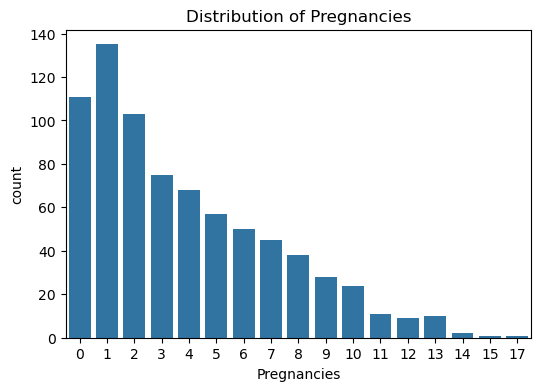

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pregnancies')
plt.title("Distribution of Pregnancies")
plt.show()

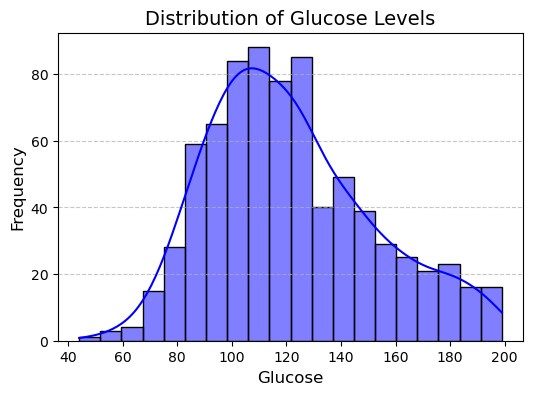

In [22]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Glucose', bins=20, kde=True, color='blue')  
plt.title("Distribution of Glucose Levels", fontsize=14)
plt.xlabel("Glucose", fontsize=12)  
plt.ylabel("Frequency", fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

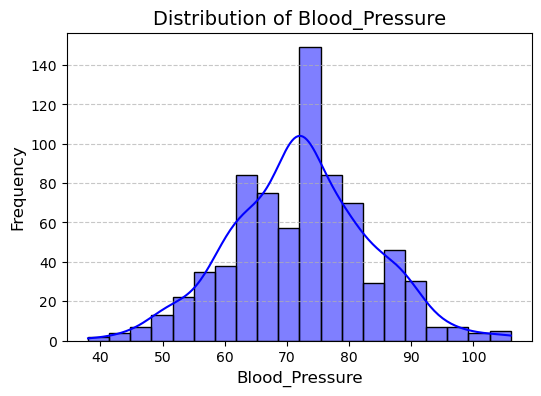

In [23]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Blood_Pressure', bins=20, kde=True, color='blue')  
plt.title("Distribution of Blood_Pressure", fontsize=14)
plt.xlabel("Blood_Pressure", fontsize=12)  
plt.ylabel("Frequency", fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

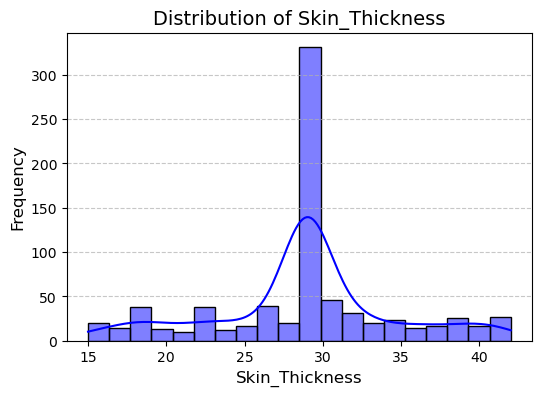

In [24]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Skin_Thickness', bins=20, kde=True, color='blue')  
plt.title("Distribution of Skin_Thickness", fontsize=14)
plt.xlabel("Skin_Thickness", fontsize=12)  
plt.ylabel("Frequency", fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

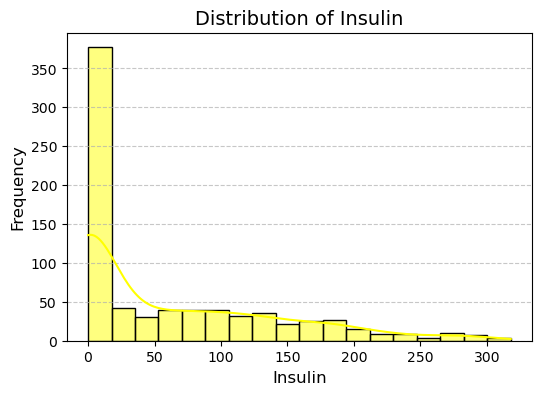

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x='Insulin',bins=18,kde=True,color='yellow')
plt.title("Distribution of Insulin", fontsize=14)
plt.xlabel("Insulin", fontsize=12)  
plt.ylabel("Frequency", fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

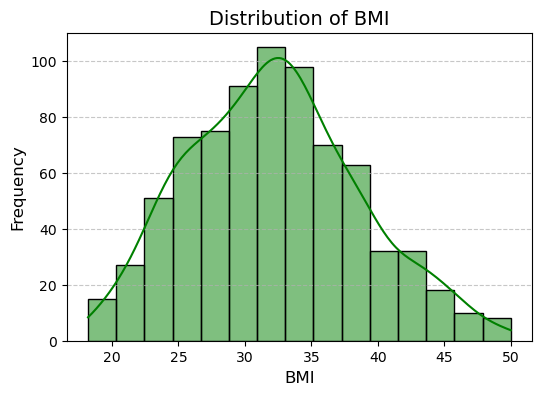

In [28]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='BMI', bins=15, kde=True, color='green')  
plt.title("Distribution of BMI", fontsize=14)
plt.xlabel("BMI", fontsize=12)  
plt.ylabel("Frequency", fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

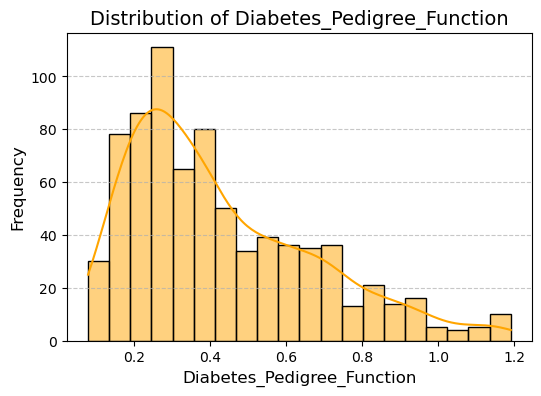

In [29]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Diabetes_Pedigree_Function', bins=20, kde=True, color='orange')  
plt.title("Distribution of Diabetes_Pedigree_Function", fontsize=14)
plt.xlabel("Diabetes_Pedigree_Function", fontsize=12)  
plt.ylabel("Frequency", fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

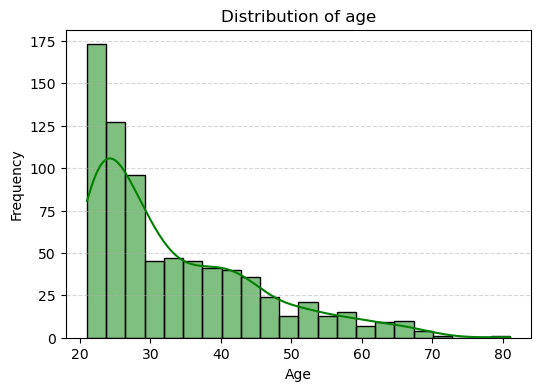

In [30]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x='Age',bins=22,kde=True,color='green')
plt.title('Distribution of age',fontsize=12)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.show()

### 4.3 Bivariate Analysis

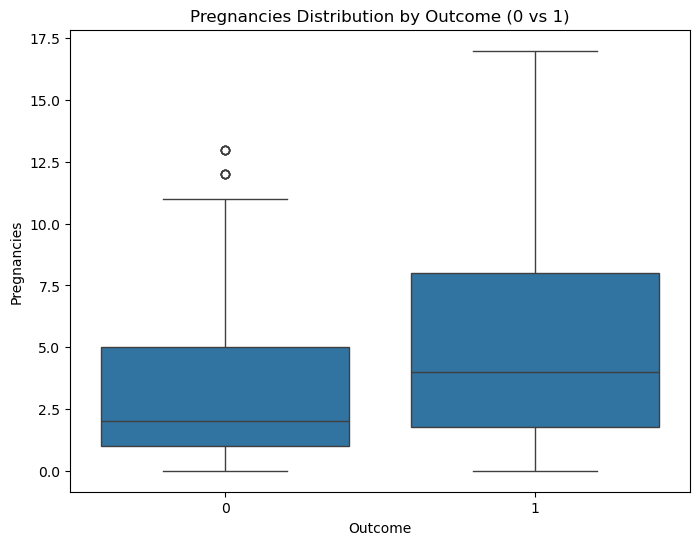

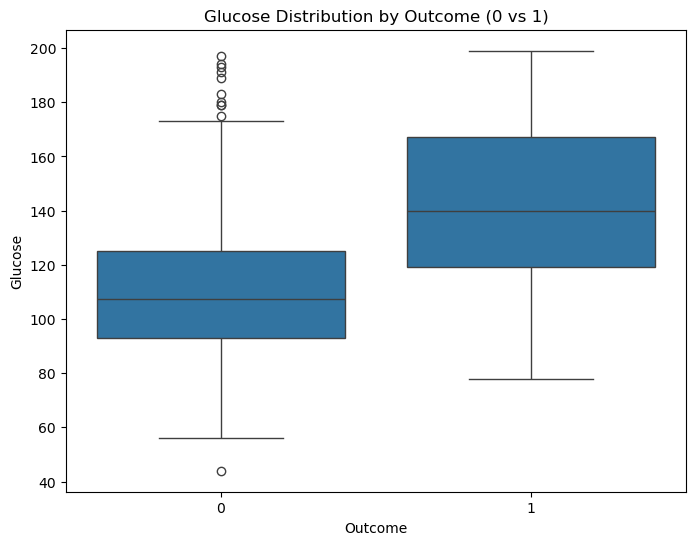

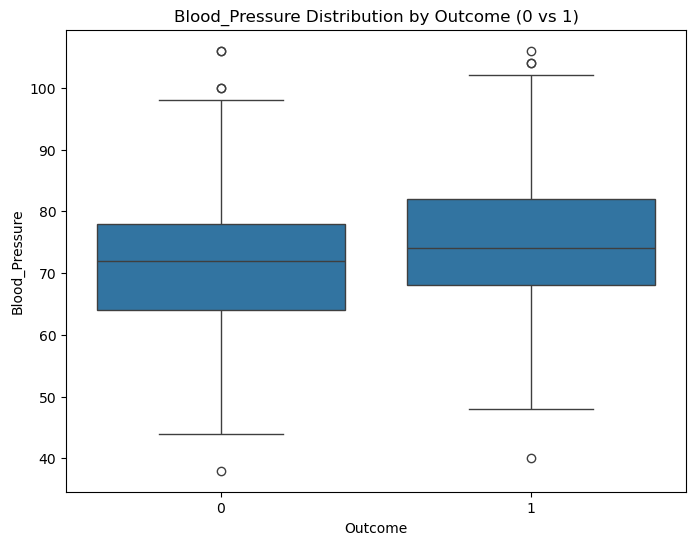

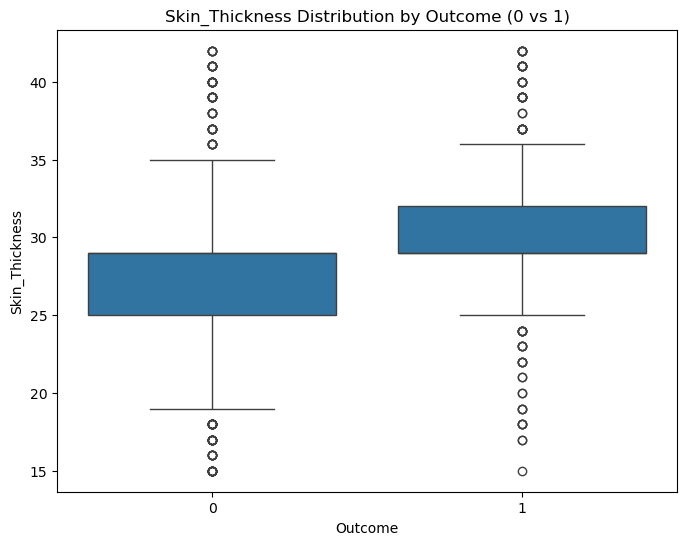

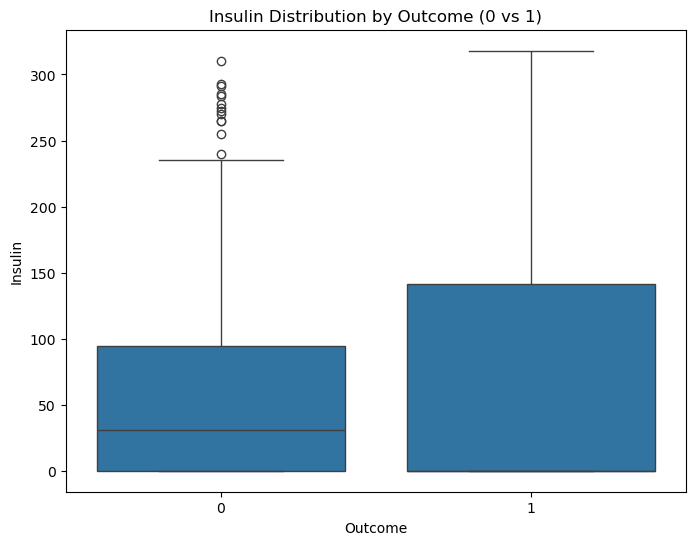

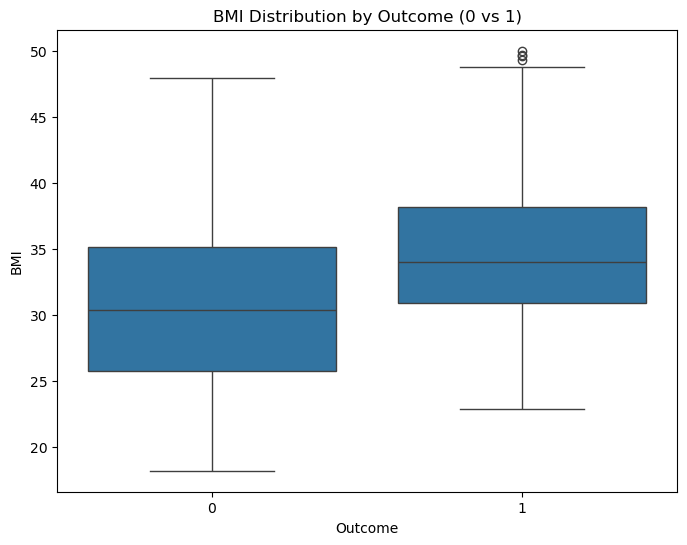

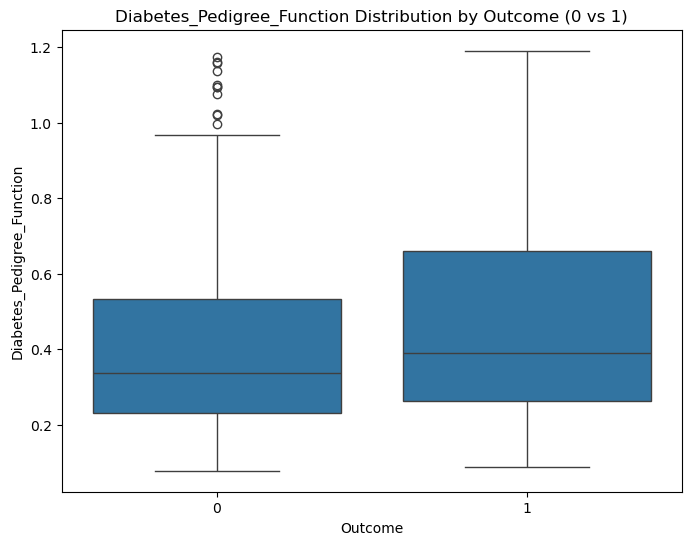

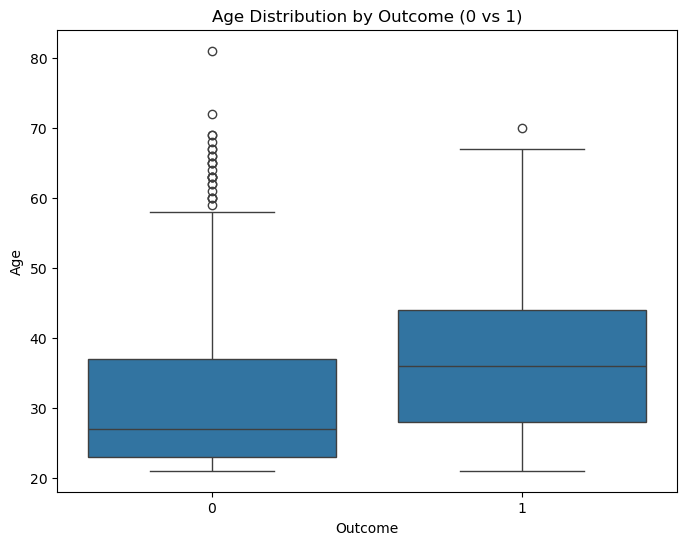

In [16]:
# Box plots for each numerical column by Outcome
numerical_columns = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f"{col} Distribution by Outcome (0 vs 1)")
    plt.show()


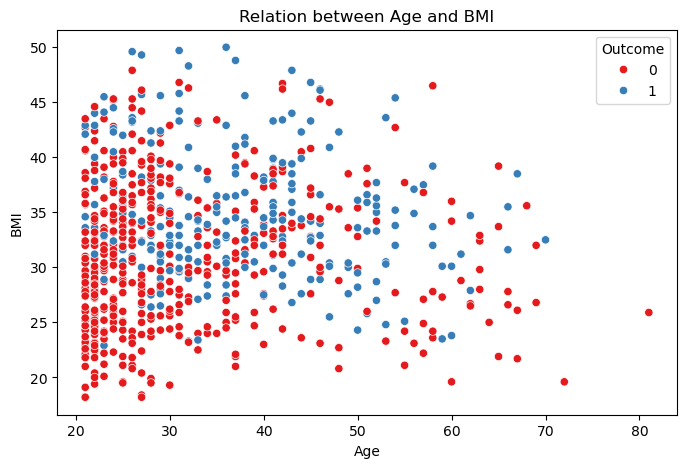

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='Age',y='BMI',hue='Outcome',palette='Set1')
plt.title('Relation between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

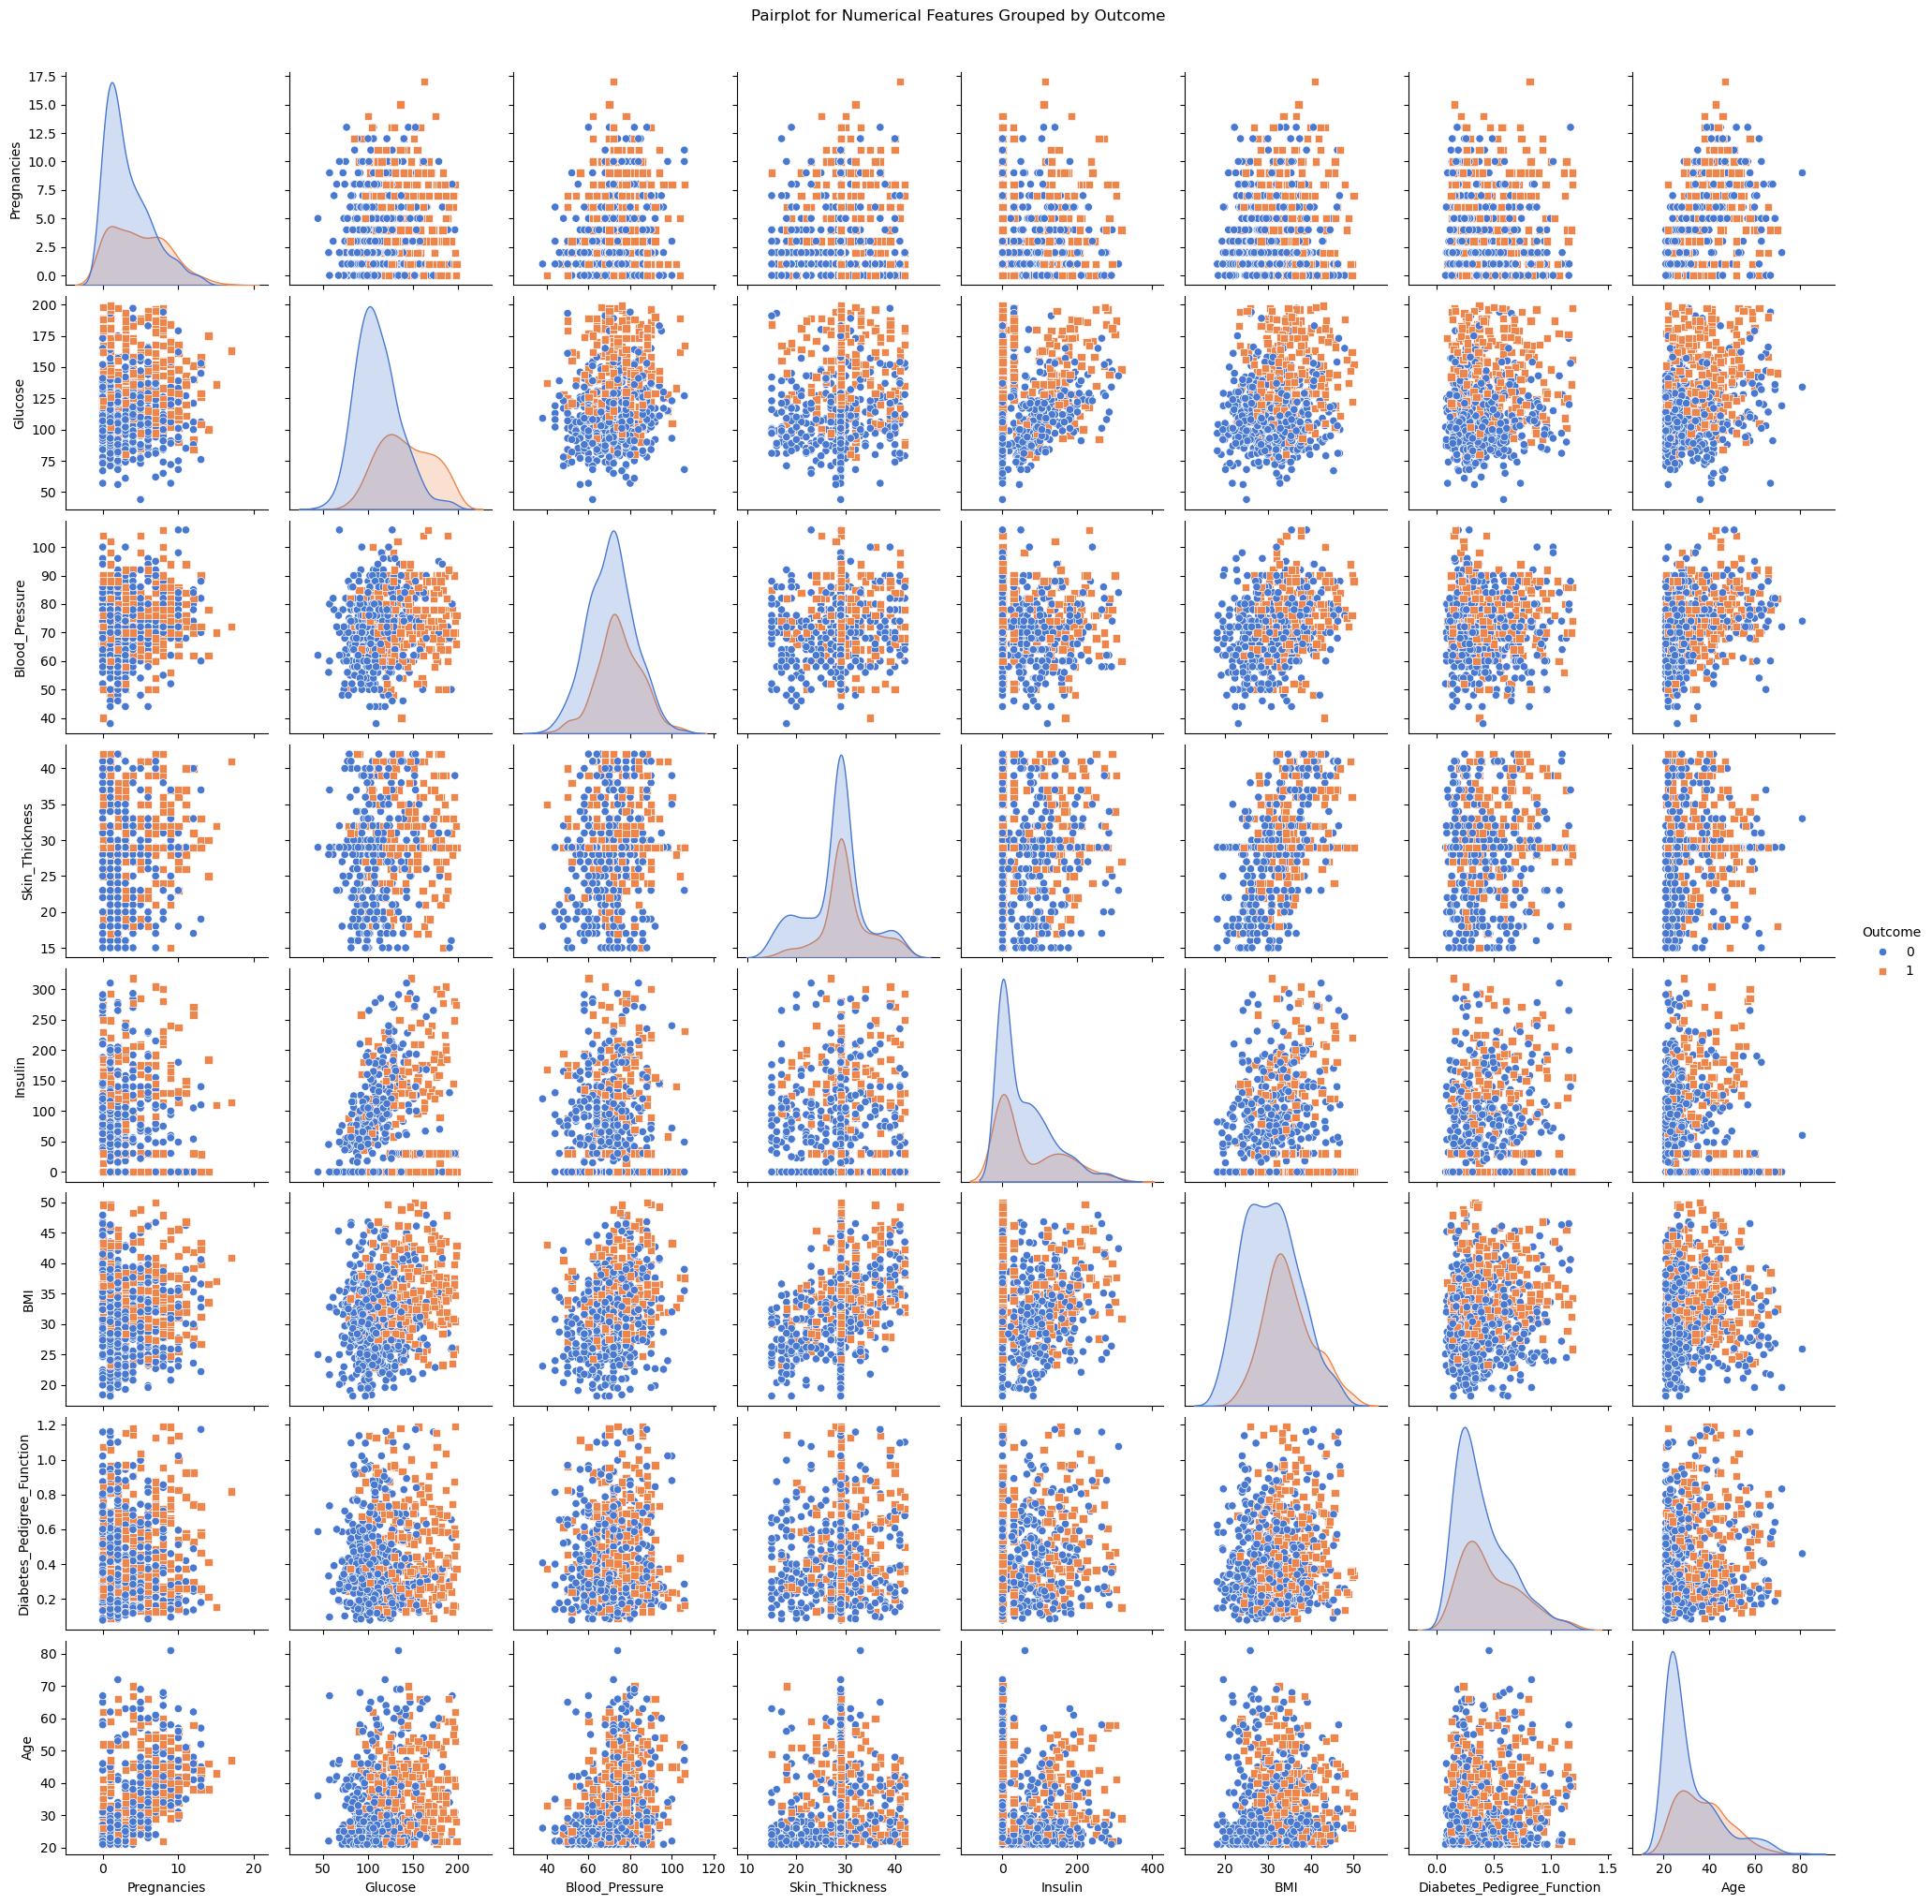

In [20]:
# Pairplot to show relationships between features, grouped by Outcome
sns.pairplot(df, vars=numerical_columns, hue="Outcome", markers=["o", "s"], palette="muted")
plt.suptitle("Pairplot for Numerical Features Grouped by Outcome", y=1.02)
plt.show()

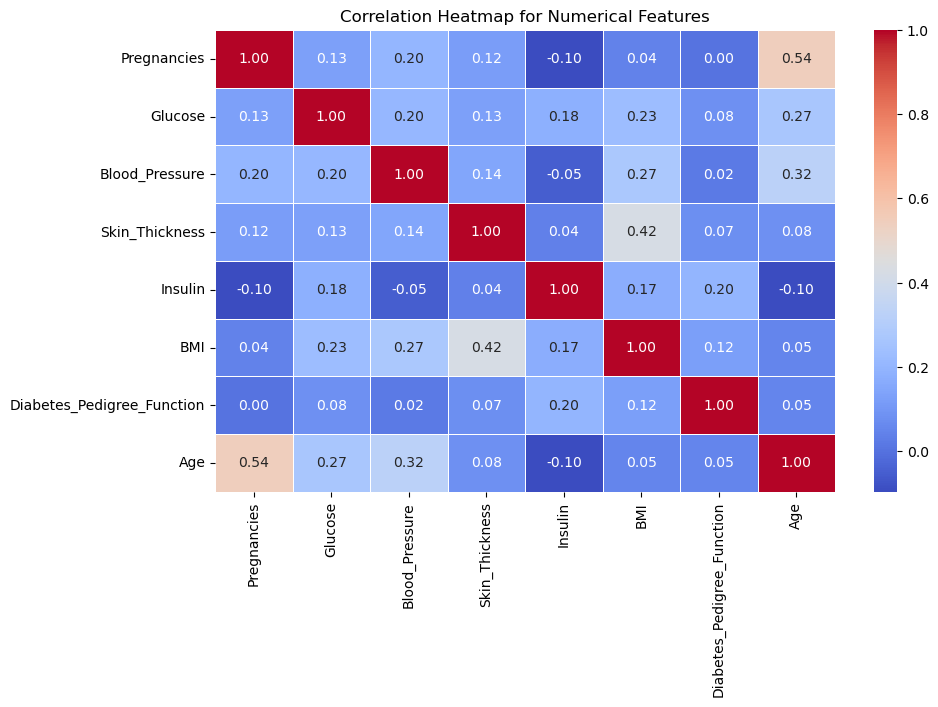

In [32]:
df.groupby(["Outcome"])[['Glucose','Blood_Pressure',"Skin_Thickness"]].mean().reset_index()
corr = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

## **5. Model Building**

In [38]:
x=df.drop('Outcome',axis = 1)

In [39]:
y=df[['Outcome']]

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=10)

In [44]:
len(df)

768

In [42]:
len(x_train)

614

In [43]:
len(y_test)

154

In [49]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=10)
model.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [50]:
y_train_pred=model.predict(x_train)
y_train_pred[:5]

array([1, 0, 0, 0, 0], dtype=int8)

In [51]:
y_train[:5]

,Outcome
120,1
172,0
307,0
7,0
448,1


In [52]:
from sklearn import metrics
print('Accuracy',metrics.accuracy_score(y_train,y_train_pred))

Accuracy 0.7719869706840391
